The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

> Number of Instances: 41188

> Number of Attributes: 20 + output attribute.


The classification goal is to predict if the client will subscribe a term deposit (variable y).


# Attribute information:
   Input variables:
  
   ## Bank client data:
   
   1 - age (numeric)
  
   2 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
   
   3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
  
   4 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

   
   5 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
  
   6 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
  
   7 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
  
   ## Related with the last contact of the current campaign:
   
   8 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
   9 - Dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
  
   10 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
   11 - Duration: last contact duration, in seconds (numeric). 
   
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  
   ## other attributes:
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  
  ## Social and economic context attributes:
  
  16 - Emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - Cons.price.idx: consumer price index - monthly indicator (numeric)
  
  18 - Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
  
  19 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - Nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = '../input/bank-marketing/bank-additional-full.csv'
df  = pd.read_csv(path)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
print(df.y.value_counts())

dfgrouped = df.groupby('y')

no     36548
yes     4640
Name: y, dtype: int64


In [5]:
# for type,data in dfgrouped:
#   display(type)
#   display(data)

'no'

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


'yes'

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
def feature_perc(feature, groupby= 'yes'):

  count = dfgrouped.get_group(groupby)[feature].value_counts()
  total_count = df[feature].value_counts()[count.index]

  perc = (count/total_count)*100
  return perc 


def plot_barh(array,incrementer, bias,ax= None, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

  sns.set_style(palette_style)
  sns.set_palette(palette_color)
    
  sns.barplot(x= array, y= array.index, ax=ax)
  #plt.barh(array.index, width = array.values, height = .5)
  plt.yticks(np.arange(len(array)))
  plt.xticks( range(0, round(max(array)) +bias, incrementer ))

  for index, value in enumerate(array.values):
    plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

  #plt.show()
  return plt

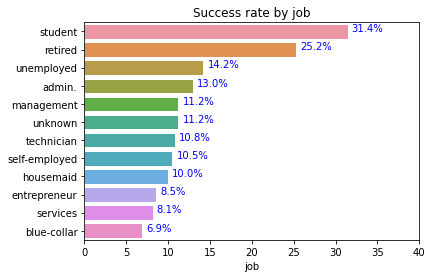

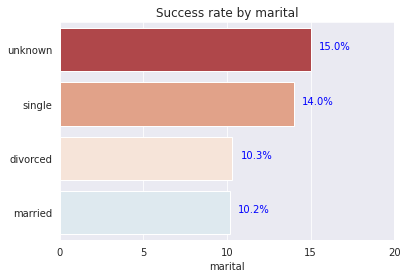

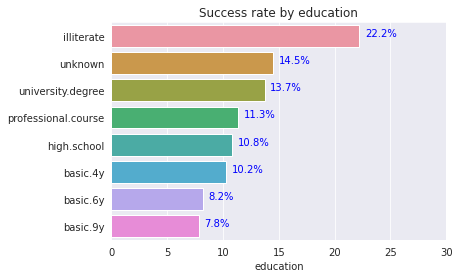

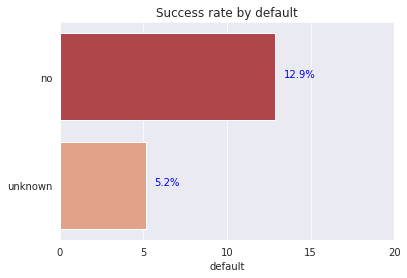

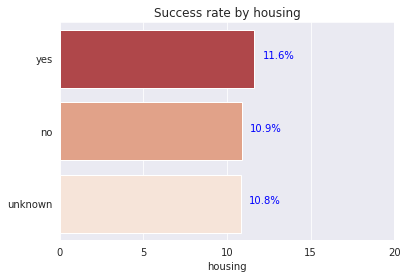

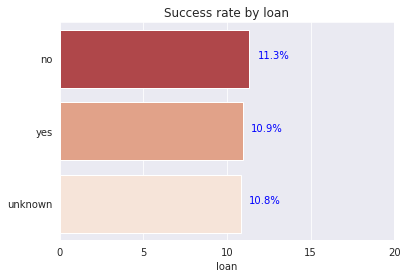

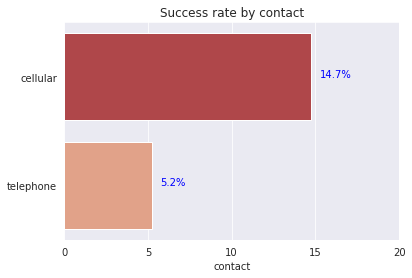

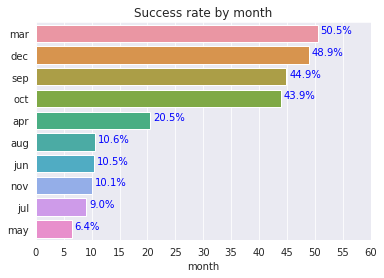

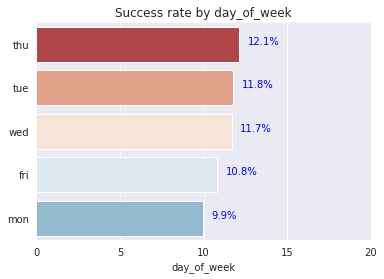

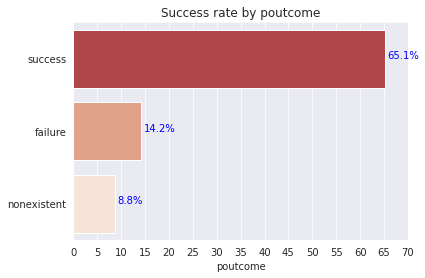

In [7]:
object_feature_list = list(df.dtypes[df.dtypes == 'object'].index)

for feature in object_feature_list[:-1]:
    
    feature_perct =  feature_perc(feature)
    plt.title('Success rate by {}'.format(feature))
    plot_barh(feature_perct.sort_values(ascending= False),5,10, text_color = 'blue')
    plt.show()

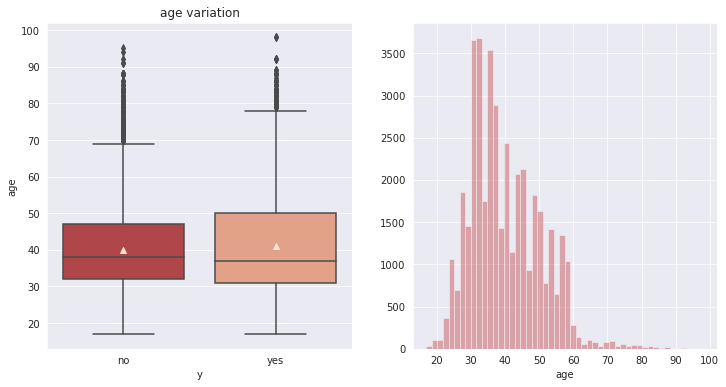

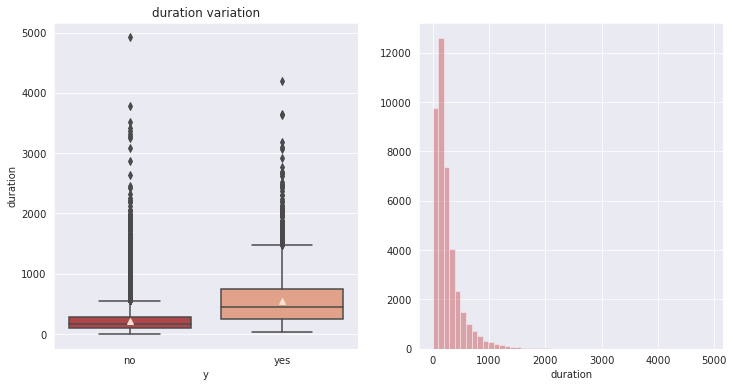

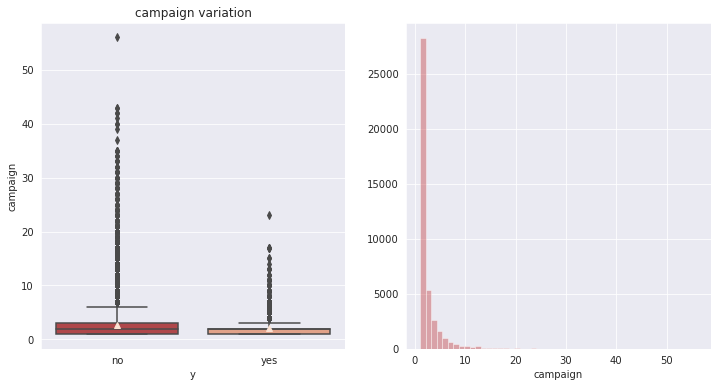

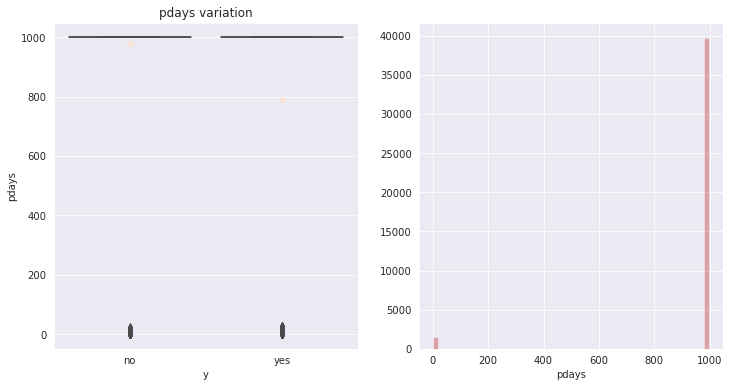

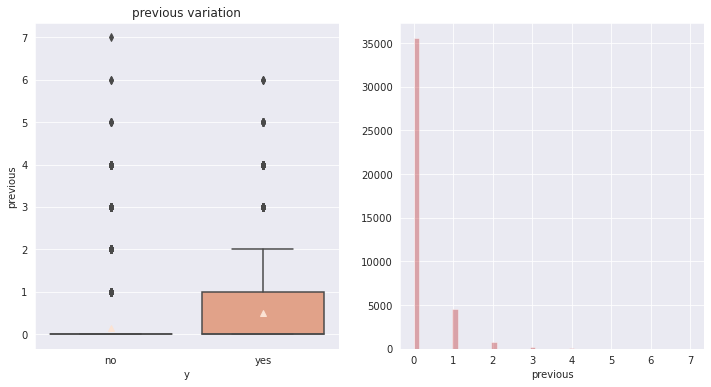

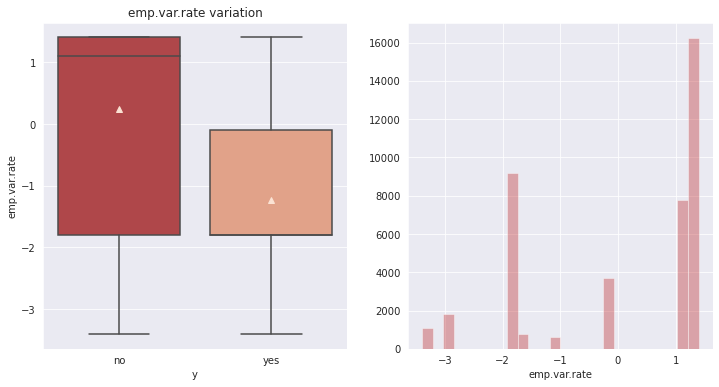

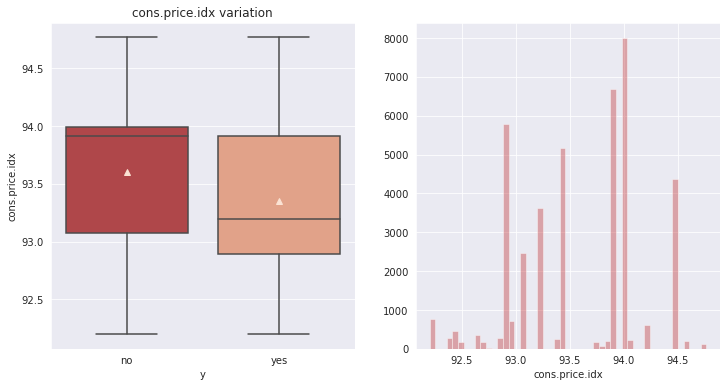

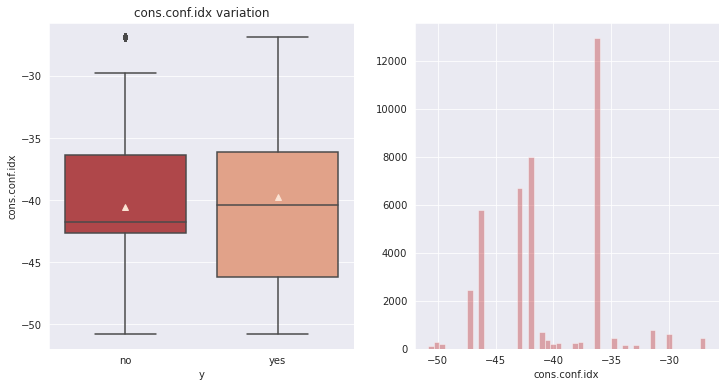

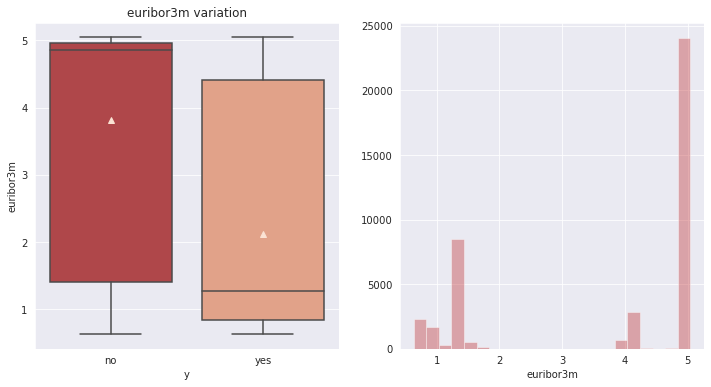

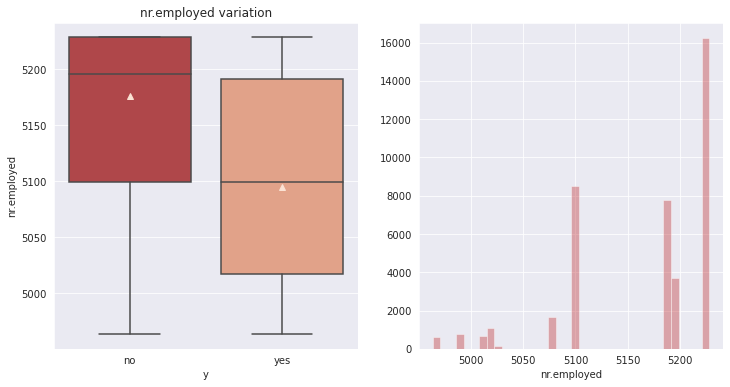

In [8]:
int_feature_list = list(df.dtypes[df.dtypes != 'object'].index)

for feature in int_feature_list:
    
    fig, ax = plt.subplots(1,2, figsize= (12,6))
    sns.boxplot(x='y', y=feature, data =df, showmeans=True, ax = ax[0])
    sns.distplot(df[feature], ax = ax[1], kde= False)
    ax[0].set_title('{} variation'.format(feature))
    plt.show()


In [9]:
#df.drop(df[df['duration']>4000].index,  inplace =True)

In [10]:
#df.drop( df[df.previous>100].index, inplace=True)

In [11]:
df['y'] = df.y.apply(lambda x:0 if x=='no' else 1)
# display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [12]:
df2 = pd.get_dummies(df)
# display(df2.head())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
# display(df2.corr()['y'].sort_values(ascending= False))

y                       1.000000
duration                0.405274
poutcome_success        0.316269
previous                0.230181
contact_cellular        0.144773
                          ...   
poutcome_nonexistent   -0.193507
emp.var.rate           -0.298334
euribor3m              -0.307771
pdays                  -0.324914
nr.employed            -0.354678
Name: y, Length: 64, dtype: float64

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('y',axis=1),
                                                    df2['y'],
                                                    test_size=.25, random_state = 42,
                                                    stratify= df2['y'])

In [16]:
stsc = StandardScaler()
s_X_train = stsc.fit_transform(X_train)
s_X_test = stsc.transform(X_test)

In [17]:
model = LogisticRegression()
#model = SVC()
#model = RandomForestClassifier()
model.fit(s_X_train,y_train)

LogisticRegression()

In [18]:
model.score(s_X_train,y_train)

0.9100708944352724

In [19]:
model.score(s_X_test,y_test)

0.914829562008352

In [20]:
confusion_matrix(y_train, model.predict(s_X_train))

array([[26658,   753],
       [ 2025,  1455]])

In [21]:
print(classification_report(y_train, model.predict(s_X_train)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     27411
           1       0.66      0.42      0.51      3480

    accuracy                           0.91     30891
   macro avg       0.79      0.70      0.73     30891
weighted avg       0.90      0.91      0.90     30891



In [22]:
confusion_matrix(y_test, model.predict(s_X_test))

array([[8922,  215],
       [ 662,  498]])

In [23]:
print(classification_report(y_test, model.predict(s_X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9137
           1       0.70      0.43      0.53      1160

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.91     10297



## ML Model Building

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

In [25]:
X_train, X_test, y_train, y_test  = train_test_split(
                                    df2.drop('y', axis=1), df2['y'], test_size=.25, random_state = 0, stratify= df2['y'])

In [26]:
#model = LogisticRegression()
#model = DecisionTreeClassifier()
model = RandomForestClassifier()
#model = SVC

In [27]:
steps = [('scaler', StandardScaler()),
         ('model', model)]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [28]:
y_pred = pipeline.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [29]:
print('confusion matrix for training data:')
print(confusion_matrix(y_train, pipeline.predict(X_train)))
print('==============================')
print('confusion matrix for testing data:')
print(confusion_matrix(y_test, pipeline.predict(X_test)))

confusion matrix for training data:
[[27411     0]
 [    0  3480]]
confusion matrix for testing data:
[[8854  283]
 [ 658  502]]


In [30]:
print('classification report for training data:')
print(classification_report(y_train, pipeline.predict(X_train)))
print('==============================')
print('classification report for testing data:')
print(classification_report(y_test, pipeline.predict(X_test)))

classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27411
           1       1.00      1.00      1.00      3480

    accuracy                           1.00     30891
   macro avg       1.00      1.00      1.00     30891
weighted avg       1.00      1.00      1.00     30891

classification report for testing data:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9137
           1       0.64      0.43      0.52      1160

    accuracy                           0.91     10297
   macro avg       0.79      0.70      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [31]:
accuracy_score(y_test, pipeline.predict(X_test))

0.9086141594639215

## Still not completed.